# NLE Assignment: Sentiment Classification



In [1]:
candidateno=251041 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pramod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pramod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Pramod\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['the', 'deer', 'hunter', ',', 'directed', 'by', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

First of all we have to get content words that represent positive and negative words in our training data. For that, we have to clean the training data. Afterwards, we have to also eliminate stop words, numbers and punctuations. Sincem these words does not fit to either positive or negative in the dataset.

Most of the frequent stops words comes in the category of a, an, the. To remove them, we have imported stopwords from nltk.corpus. nltk is natural language tool kit, which is useful for language data. Whereas, Corpus is a module within nltk, which is used to read corpus files. 

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
def normalise(wordlist):
    lowered=[word.lower() for word in wordlist] 
    filtered=[word for word in lowered if word.isalpha() and word not in stop]
    return filtered

Then, we have introduced a function called normalise on wordlist. Where we are normalising all the word into the list. Initially, we try to  convert words of a list to lowercase in a variable called lowered. Afterwards, the python inbuilt function (.lower) convert a word string to lowercase. Also, we use an inbuilt function called (.isalpha) we run it to the code line and  return to filtered list of words.

In [7]:
training_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

for reviewDist,label in training_norm:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist       


As we have a funtion to noramlised word, now we wiil normalise the training data. Training data, we will have a lot of words, which we might not able to need, as we are more interested for words, which has positive and negative meaning.

From nltk package we importe FreqDist module, which will tell us how many times a word has occured. this will give us most frequent word as well.

Now we perform the same wordlist that has defined and applied on normalised function on the testing data as well.

We have already had training and testing data which are list of words and already has frequent words on them.

In [8]:
def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords

We have a function most_frequent_words, which takes arguments as posfreq, negfreq and topk. Later on, we are getting a difference from pos and neg frequency word. Also, we will get most commom word on sortediff.


now we will have top ten different positive words under the function top_pos

In [9]:
top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,10)
print(top_pos)

['film', 'life', 'also', 'well', 'great', 'story', 'many', 'best', 'films', 'world']


now we will have top ten different negative words under the function top_neg

In [10]:
top_neg=most_frequent_words(neg_freq_dist,pos_freq_dist,10)
print(top_neg)

['bad', 'movie', 'plot', 'worst', 'nothing', 'script', 'boring', 'stupid', 'even', 'get']


2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


We create a class of Wordlist classifier , which will have function within it to initialise and classify the data.

Now Create a object of class wordlist_classifier and pass the top 10 positive and negative words to the class.

In [11]:

from nltk.classify.api import ClassifierI
import random

class WordListClassifier(ClassifierI): 

    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

    def classify(self, doc): 
        score = 0
        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value     
        return "neg" if score < 0 else "pos" 
    
    def labels(self): 
        return ("pos", "neg")


classifier = WordListClassifier(top_pos, top_neg)
classifier.classify(FreqDist("This movie was best".split()))


    

'pos'

Therefore, in the above cells using the lists generated in Q1,we created a word list classifier which will classify reviews as being positive or negative.

Basically, we created a class of Wordlist classifier, which have function inside it to intizalise and classify the data. And then created a object of that class to access all the functions of the class. We passed the parameters in the object as top positive and negitive movies we created in the question number 1.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

To calulate accuracy, precision, recall and F1 score of our wordlist classifier. Firstly, create a evaluater of the classifer in which we will test our classifier on the unseen data that is testing data. we will initialize the accuracy as zero and then increase it when are prediction is correct.

In [12]:
def classifier_evaluate(cls, test_data):
    acc = 0
    docs,goldstandard=zip(*test_data) #note this neat pythonic way of turning a list of pairs into a pair of lists
    #pass all of the docs to the classifier and get back a list of predictions
    predictions=cls.classify_many(docs)
    #zip the predictions with the goldstandard labels and compare
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1    
    return acc / (len(test_data))

In [13]:
random.seed(41)  #set the random seeds so these random splits are always the same
training,testing=get_train_test_data()
training = [(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training]
testing = [(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing]



In [14]:

class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        
    
    def precision(self):
        p=0
        p = self.TP / (self.TP + self.FP)
        return p
  
    def recall(self):
        r=0
        r = self.TP/ (self.TP + self.FN)
        return r
  
    def f1(self):
        f1=0
        p = self.TP / (self.TP + self.FP)
        r = self.TP/ (self.TP + self.FN)
        f1 = (2*p*r) / (p+r)     
        return f1 

In [15]:
movie_classifier1 = WordListClassifier(top_pos,top_neg)
score = classifier_evaluate(movie_classifier1, testing)  
print(score*100)

65.66666666666666


Now, we will create a confusion matrix. A confusion matrix is a summarized table of the number of correct and incorrect predictions (or actual and predicted values) given by a classifier (wordlist_clasifier) for binary classification tasks. Basically, in the confusion matrix we will be intializing our true positive, true negative, false positive and false negative as zero and change on the comparision of predicted label and goldstand label(true value).

In [16]:
#docs will contain the documents to classify, labels contains the corresponding gold standard labels
docs,labels=zip(*testing)
senti_cm=ConfusionMatrix(movie_classifier1.classify_many(docs),labels)
print(senti_cm.TP)
print(senti_cm.FP)
print(senti_cm.TN)
print(senti_cm.FN)

250
156
144
50


When we have a model for classification, we wanted to check the accuracy of the model, whether it has have all the predications made are accurate nor not. But Classification accuracy is not enough for taking the decision. For example, if take data from brest cancen occurence,then false negative is more worse than false postive. Meanwhile, if we calucuate recurrence without having the accuracy, it will show very high value, which will give a trouble of having overfitting data. so, just getting accuracy could be trouble in that case.

4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

Developing our own NB classifier is great for understanding how it works. But, in practice, it is usually more convenient to use a standard one imported from a library. NLTK provides a NB classifier (as do other libraries such as sklearn). It can be imported and trained as follows. Therefore, we will import NaiveBayesClassifier from the nltk classify to compare with our classifier.

In [17]:
Naive_Classifier = nltk.NaiveBayesClassifier.train(training)
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing))*100)
# Naive_Classifier.show_most_informative_features()
senti_cm2=ConfusionMatrix(Naive_Classifier.classify_many(docs),labels)
print(senti_cm2.TP)
print(senti_cm2.FP)
print(senti_cm2.TN)
print(senti_cm2.FN)

Classifier accuracy percent: 65.66666666666666
295
160
140
5


We can see that we are getting false positive more and therefore from the values of the true positive, true negative, false positive, false negative, we can conclude naive classifier is baised for this set of data. And also comparing our classifier with NLTK classifier there is not much differenece.

If I have to pick between Naive Bayes classifier or our wordlist classifier, I will go with Naive Bayes classifier as the parameters of Naive Bayes classifier is more promising. But, Naive Bayes classifier will not be good if we want to tune our parameters as if we Want our classifier to be more inclinded towards Recall or precision Naive Bayes classifier will not be able to do. As i got to know in my lectures that google search bar is more inclined towards recall than precision. And there can be past of the data to which can lead to biasness as data can not speak for the past. Nevertheless, at the end the day it depends on the dataset we are working on at some point Naive Bayes classifier will be give good results and at some we have to check for the past and all the factors that can result in the overfiting of the data.

5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [18]:
word_list_size = 50
samples=[1,10,50,100,200,400]
results={}
acc_res={}
pre_res={}
recal_res={}
f1_res={}
number_of_runs = 3
for i in samples:
    top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,i)
    top_neg=most_frequent_words(neg_freq_dist,pos_freq_dist,i)
    classifier = WordListClassifier(top_pos,top_neg)
    #confusion matrix
    docs,labels=zip(*testing)
    senti=ConfusionMatrix(classifier.classify_many(docs),labels)
    pre_res[i] = pre_res.get(i,0)+senti.precision() 
    recal_res[i] = recal_res.get(i,0)+senti.recall()
    f1_res[i] = f1_res.get(i,0)+senti.f1()
    acc_res = classifier_evaluate(classifier, testing)
    results["accuracy"] = acc_res
    results["precision"] = pre_res
    results["recall"] = recal_res
    results["f1 score"] = f1_res
    #print(results)
df=pd.DataFrame(results)
df=df.transpose()
df
    

    



,1,10,50,100,200,400
accuracy,0.661667,0.661667,0.661667,0.661667,0.661667,0.661667
precision,0.518919,0.615764,0.556391,0.573386,0.609856,0.597194
recall,0.960000,0.833333,0.986667,0.976667,0.990000,0.993333
f1 score,0.673684,0.708215,0.711538,0.722565,0.754765,0.745932


Text(0.5, 0, 'Sample Size')

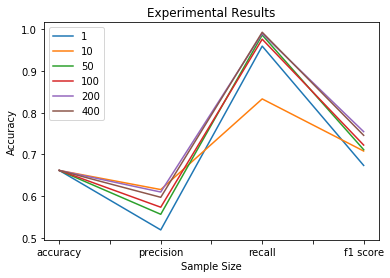

In [19]:
ax = df.plot(kind="line",title="Experimental Results")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Sample Size")

The graph we got shows that the accuracy of our classifier is increasing with the increase of our word count and then starts decreasing after creating a maximum. So, we can infer that our classifier will have maximum accuracy near 500 wor

In [26]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

#filepath="/content/drive/My Drive/NLE Notebooks/assessment/assignment1.ipynb"
filepath="NLassignment2021_Nov.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 243
